In [1]:
%cd ../py3
import os
wd = os.path.dirname(os.getcwd())
os.environ['PYTHONPATH'] = wd
%run config_path.py
%matplotlib inline

/mnt/ceph/users/zzhang/pnet_prostate_paper/py3


In [2]:
from model.builders.builders_utils import get_map_from_layer, get_layer_maps
from data.pathways.reactome import ReactomeNetwork
from data.pathways.reactome import Reactome
from data.pathways.reactome import complete_network

Using TensorFlow backend.


## `data.pathway.reactome.ReactomeNetwork`

In [3]:
reactome = ReactomeNetwork()

In [5]:
print(reactome.info())

Name: reactome
Type: DiGraph
Number of nodes: 2223
Number of edges: 2271
Average in degree:   1.0216
Average out degree:   1.0216


/mnt/home/zzhang/anaconda3/envs/decan/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/mnt/home/zzhang/anaconda3/envs/decan/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


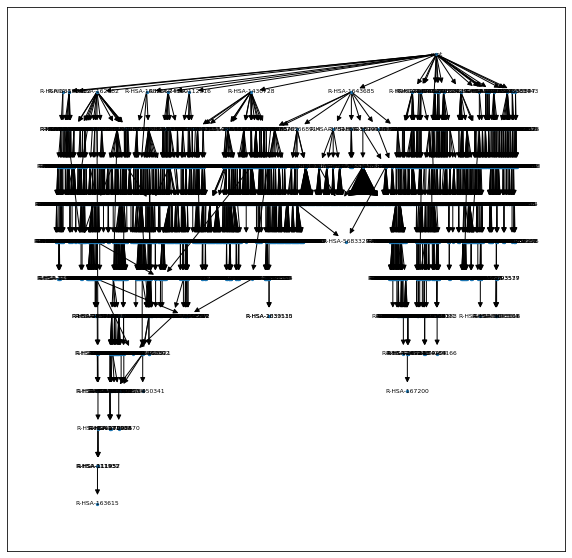

In [6]:
# See https://github.com/zj-zhang/AMBER/blob/master/amber/plots/ontology.py
import matplotlib.pyplot as plt
import networkx as nx
# from GenoPheno2 import SubSystem
from networkx.drawing.nx_agraph import graphviz_layout

def plot_dag(g):
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    pos = graphviz_layout(g, prog='dot')
    _ = nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_size=5, ax=ax)
    _ = nx.draw_networkx_labels(g, pos, font_size=6, ax=ax)
    _ = nx.draw_networkx_edges(g, pos, arrow=True, ax=ax)
    plt.show()

plot_dag(reactome.netx)

In [7]:
def complete_network2(G, n_leveles=4, verbose=True):
    sub_graph = nx.ego_graph(G, 'root', radius=n_leveles)
    n_org = list(sub_graph.nodes())
    print(nx.info(sub_graph))
    terminal_nodes = [n for n, d in sub_graph.out_degree() if d == 0]
    print("n_terminal nodes", len(terminal_nodes))
    n_add = []
    for node in terminal_nodes:
        distance = len(nx.shortest_path(sub_graph, source='root', target=node))
        if distance <= n_leveles:
            n_add.append(node)
            if verbose: print(node)
            diff = n_leveles - distance + 1
            sub_graph = add_edges2(sub_graph, node, diff)
    print("num. nodes with added pseudo leaves from terminal nodes", len(n_add))
    return sub_graph, n_org, n_add

def add_edges2(G, node, n_levels):
    edges = []
    source = node
    for l in range(n_levels):
        target = node + '_copy' + str(l + 1)
        edge = (source, target)
        source = target
        edges.append(edge)
    #print(edges)
    G.add_edges_from(edges)
    return G


In [8]:
g3, n_org, n_add = complete_network2(reactome.netx, n_leveles=5, verbose=False)
print(nx.info(g3))

Name: reactome
Type: DiGraph
Number of nodes: 1940
Number of edges: 1971
Average in degree:   1.0160
Average out degree:   1.0160
n_terminal nodes 1387
num. nodes with added pseudo leaves from terminal nodes 873
Name: reactome
Type: DiGraph
Number of nodes: 3084
Number of edges: 3115
Average in degree:   1.0101
Average out degree:   1.0101


Name: reactome
Type: DiGraph
Number of nodes: 3084
Number of edges: 3115
Average in degree:   1.0101
Average out degree:   1.0101


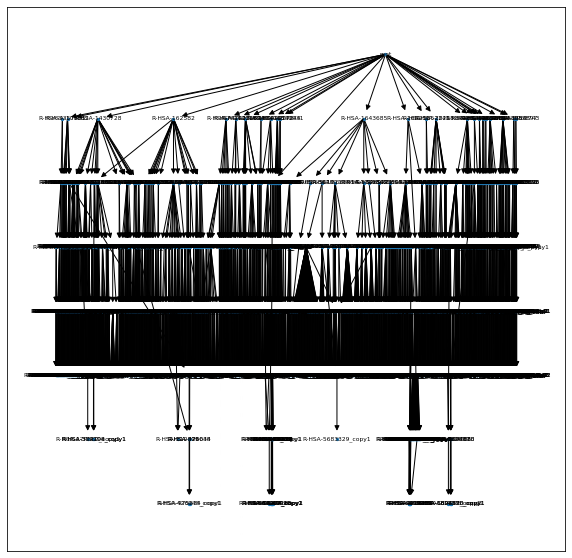

In [9]:
# returns the top n_levels from above graph,
# there will exist `terminal nodes` that are < n_levels but have no more parents/leaves
# the terminal nodes will be added pseudo edges to pseudo nodes, growing out a "pseudo" leaves
# to complement the same n_levels for all terminal nodes, 
# e.g., g->g_copy1->g_copy2 if g->root=3, and n_levels=5, then adding 2 additional 
# 
# notice the bottom part - all isolated subgraphs
g2 = complete_network(reactome.netx, n_leveles=5)
print(nx.info(g2))
plot_dag(g2)

## `data.pathway.reactome.Reactome`

In [10]:
print(reactome.reactome)

In [11]:
reactome.reactome.pathway_names.head()

,reactome_id,pathway_name,species
0,R-ATH-1369062,ABC transporters in lipid homeostasis,Arabidopsis thaliana
1,R-ATH-382556,ABC-family proteins mediated transport,Arabidopsis thaliana
2,R-ATH-163680,AMPK inhibits chREBP transcriptional activatio...,Arabidopsis thaliana
3,R-ATH-174143,APC/C-mediated degradation of cell cycle proteins,Arabidopsis thaliana
4,R-ATH-176409,APC/C:Cdc20 mediated degradation of mitotic pr...,Arabidopsis thaliana


In [12]:
reactome.reactome.hierarchy.head()

,child,parent
0,R-ATH-109581,R-ATH-169911
1,R-ATH-109581,R-ATH-75153
2,R-ATH-109582,R-ATH-140877
3,R-ATH-109582,R-ATH-418346
4,R-ATH-109582,R-ATH-76002


In [13]:
reactome.reactome.pathway_genes.head()

,group,gene
0,R-HSA-164843,BANF1
1,R-HSA-164843,HMGA1
2,R-HSA-164843,LIG4
3,R-HSA-164843,PSIP1
4,R-HSA-164843,XRCC4


In [14]:
REACTOM_PATHWAY_PATH

'/mnt/ceph/users/zzhang/pnet_prostate_paper/_database/pathways/Reactome'